# **Personal Loan Acceptance**

Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and **the bank is interested in expanding this base rapidly to bring in more loan business.** In particular, it wants to explore ways of converting its depositors to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for depositors showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing.

The file _UniversalBank.csv_ contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Environment Setup

In [1]:
# import required packages
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

In [3]:
# connect to Google Drive and load the data
# from google.colab import drive
# drive.mount('/content/drive')
bank_df = pd.read_csv('../data/UniversalBank.csv')
bank_df.info()
bank_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

# 1. Classification Trees

The goal here is to use classification trees to predict whether a new customer will accept a loan offer.

## Preprocessing

In [4]:
# drop ID and ZIP Code columns
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Education is coded as numerical, but inherently is an ordered categorical variable
# We could recode it as categorical or leave it as is (won't matter much here)
# bank_df['Education'] = bank_df['Education'].astype('category')

# Define X (inputs/predictors) and y (output/outcome)
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Build the Full Tree

In [5]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [6]:
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 85


In [7]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)
print(text_representation)

|--- feature_2 <= 110.50
|   |--- feature_4 <= 2.95
|   |   |--- feature_2 <= 106.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  106.50
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- feature_1 <= 12.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  12.00
|   |   |   |   |   |--- class: 1
|   |--- feature_4 >  2.95
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_2 <= 92.50
|   |   |   |   |--- feature_0 <= 26.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  26.50
|   |   |   |   |   |--- feature_4 <= 3.55
|   |   |   |   |   |   |--- feature_4 <= 3.35
|   |   |   |   |   |   |   |--- feature_4 <= 3.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  3.05
|   |   |   |   |   |   |   |   |--- feature_4 <= 3.15
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 87.50
|   |   |   |   |   |   |   |   |   |   |--- cl

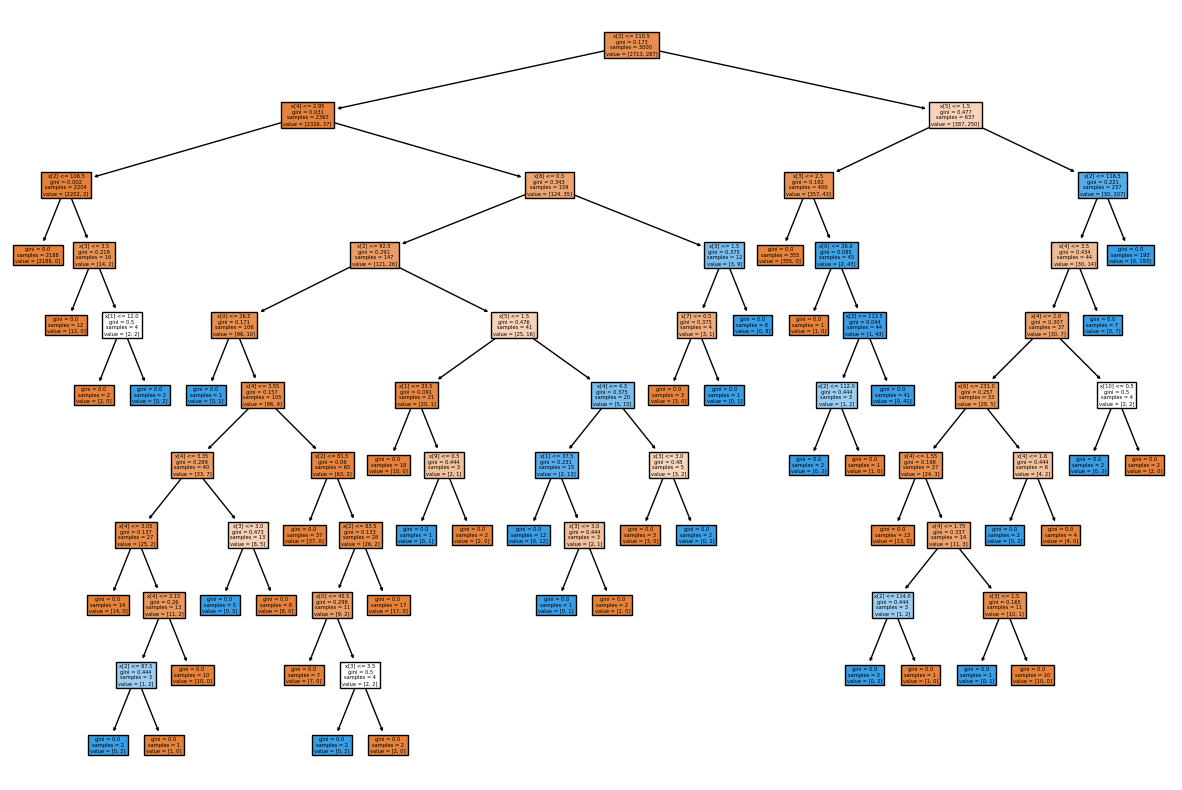

In [7]:
# Visualize the full tree via "plot_tree" function

# First, re-size the figure via matplotlib(otherwise it will be too small)
plt.figure(figsize=(15,10))

# Then call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

In [8]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

In [9]:
# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 98.0 %


In [10]:
# Confusion matrix of full tree on training and test sets
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix on train data (watch out for overfitting!):
[[2713    0]
 [   0  287]]
Confusion Matrix of full tree on test data:
[[1790   17]
 [  23  170]]


## Build a Reduced Tree (less prone to overfitting)

In [11]:
# Let's try to "shrink" the tree to make it less prone to overfitting
# the options available can be found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# The most popular ones:
# max_depth : maximum depth of the tree
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

clf = DecisionTreeClassifier(
      max_depth=10,
      min_samples_split = 40,
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

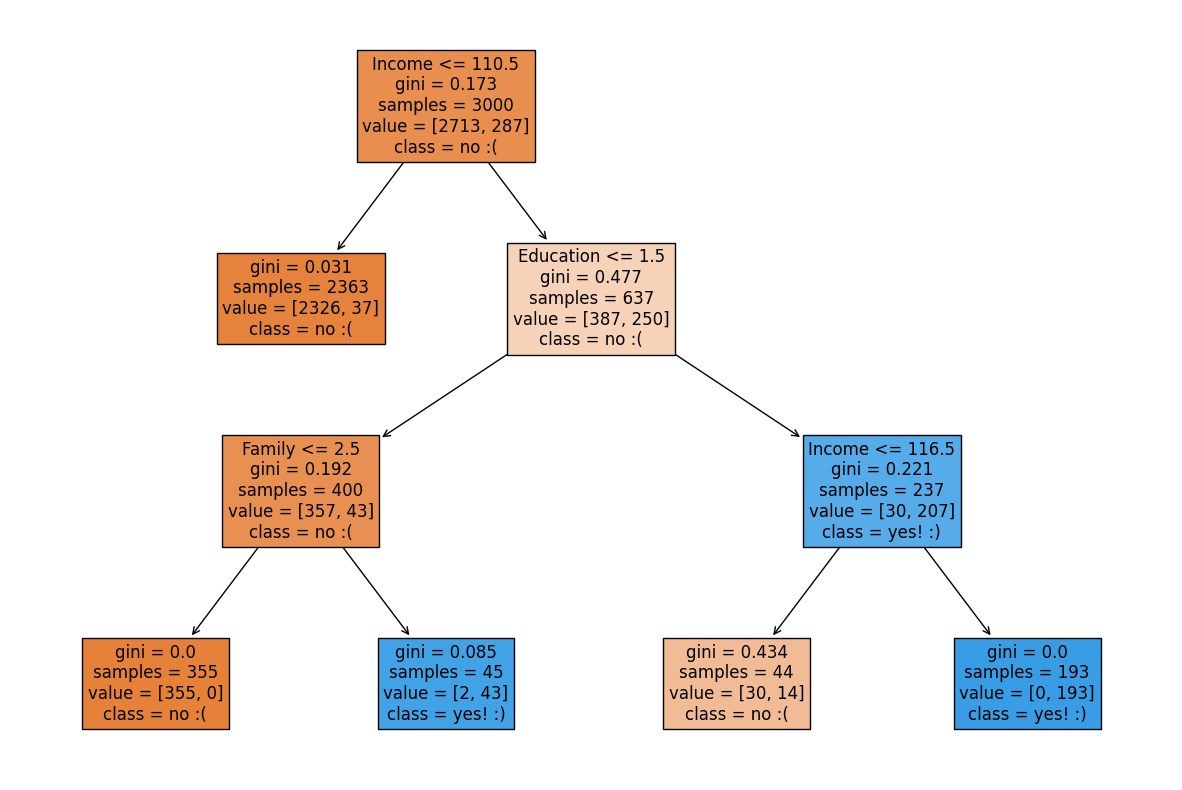

In [12]:
# Plot the reduced tree
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['no :(','yes! :)']
tree.plot_tree(clf, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);

In [13]:
# Confusion matrix of reduced tree on train and test sets
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Accuracy score of reduced tree on train data:", accuracy_score(y_train, y_pred_train)*100, "%")
print("Accuracy score of reduced tree on test data:", accuracy_score(y_test, y_pred_test)*100, "%")

print("Confusion Matrix of reduced tree on train data:")
print(confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix of reduced tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of reduced tree on train data: 98.23333333333333 %
Accuracy score of reduced tree on test data: 97.7 %
Confusion Matrix of reduced tree on train data:
[[2711    2]
 [  51  236]]
Confusion Matrix of reduced tree on test data:
[[1804    3]
 [  43  150]]


Visualize the tree using the external 'dtreeviz' package

In [14]:
%%capture
!pip install dtreeviz
import dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


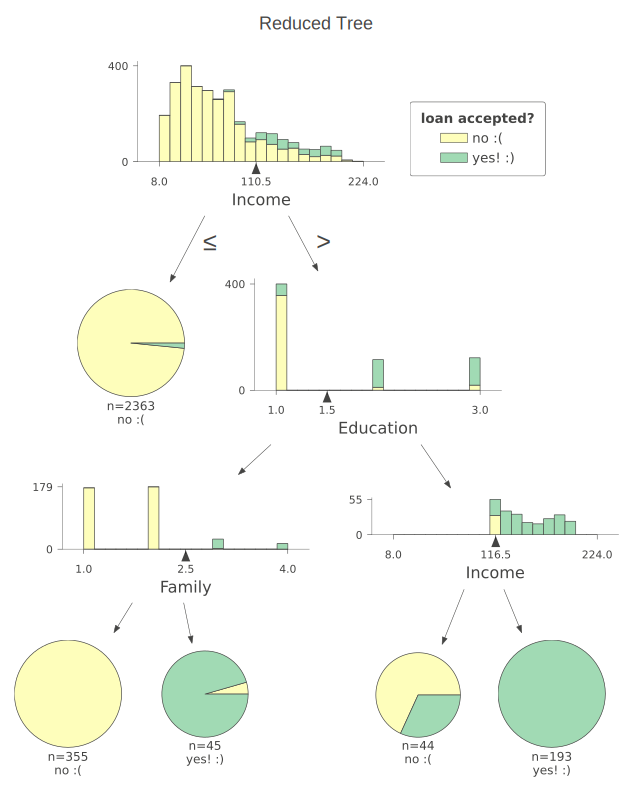

In [15]:
viz = dtreeviz.model(clf,
               X_train=X_train,
               y_train=y_train,
               target_name='loan accepted?',
               feature_names=X.columns,
               class_names=['no :(', 'yes! :)']);
viz.view(title="Reduced Tree",
         scale=1.8)

## Should we contact our newest customer, 'Isabel' with a loan offer?

In [16]:
# define the new customer
isabel = pd.DataFrame([
{
 'Age':31,
 'Experience':5,
 'Income':184,
 'Family':3,
 'CCAvg':2.9,
 'Education':3,
 'Mortgage':105,
 'Securities Account':0,
 'CD Account':0,
 'Online':0,
 'CreditCard':1
 }
 ])

In [17]:
# We need to convert the DataFrame into a Series object (required by dtreeviz)
isabel_series = isabel.iloc[0]

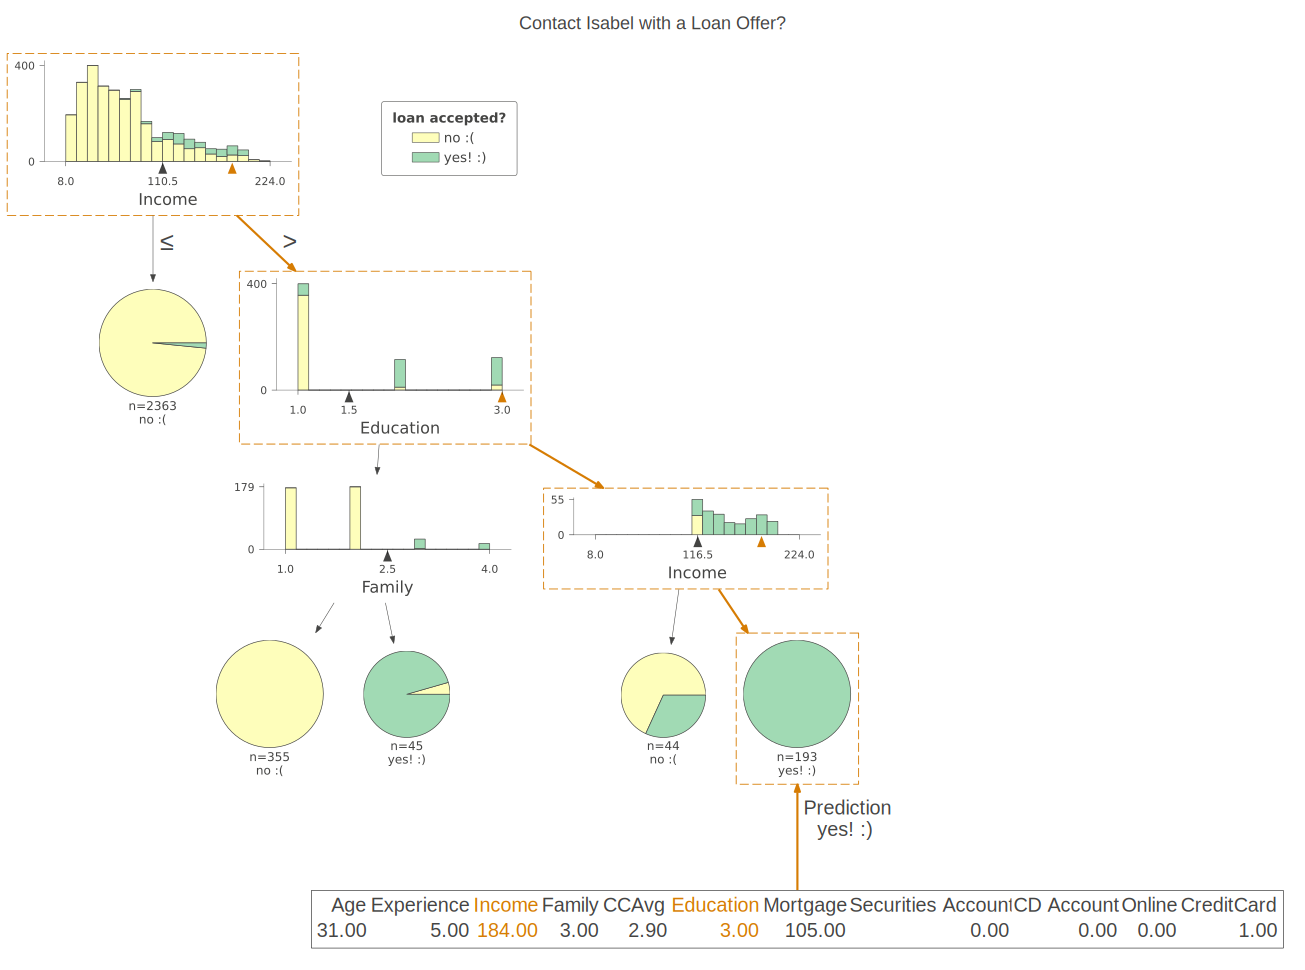

In [18]:
# Visualize what Isabel will do by adding the "X=" option inside of dtreeviz
viz.view(title="Contact Isabel with a Loan Offer?",
         scale=1.8,
         x=isabel_series)

# 2. Bonus Content for Classification Trees: Pruning, k-fold, Grid Search, Random Forest

## Bonus: Pruning the full tree with penalty parameter $\alpha$

Reminder: alpha is a penalty score that we add to penalize excessive growth.

Every time the tree splits on a node, it might increase its accuracy, but it will also incur an extra penalty of size alpha.

In [19]:
# Retrieve all the 'unique' values of penalty alpha and the impurity score
# they generate, from the full tree. We will use the cost_complexity_pruning_path() function
# To retrieve the alpha values, we need to call the option 'ccp_alphas'
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

In [20]:
# Show the alphas it extracted
alphas

array([0.        , 0.00031746, 0.00032308, 0.00032576, 0.00041152,
       0.00044404, 0.00044444, 0.00044444, 0.0005    , 0.0005015 ,
       0.00062256, 0.00068519, 0.00087772, 0.001     , 0.00250814,
       0.00257985, 0.00475125, 0.01110472, 0.02431093, 0.05284766])

In [21]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00031746031746031757, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00032307692307692284, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0003257575757575757, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00041152263374485596, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004440411373260854, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004444444444444444, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004444444444444444, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0005, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0005015015015015015, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0006225589225589228, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0006851851851851853, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0008777150638785858, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001, random_state=0),
 DecisionTreeClassifier(c

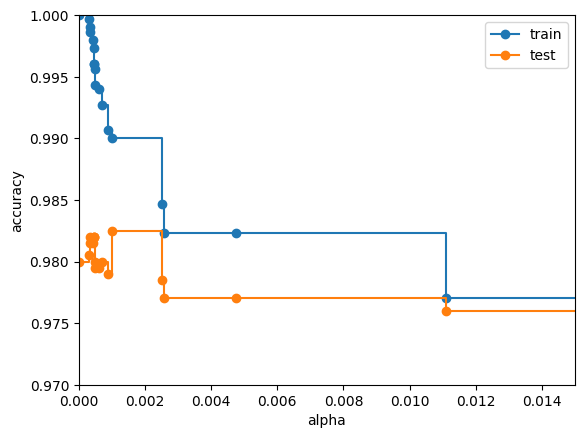

In [22]:
# Let's try to find the best alpha to use...
# We can plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

# BTW, there is also an alternative function: score() that does the same thing
# train_scores = [x.score(X_train, y_train) for x in clfs]
# test_scores = [x.score(X_test, y_test) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
plt.xlim(0,0.015)
plt.ylim(0.97,1)
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The optimal value of $\alpha$ is around 0.0025, so we would build our final tree using this value for $\alpha$.

## Bonus: k-fold cross-validation

In [23]:
# Five-fold cross-validation of the decision tree using cross_val_score function
# We're going to use the tree stored in 'clf' variable
accuracy_scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in accuracy_scores])
print('5-fold cross-validation mean accuracy:', round(accuracy_scores.mean(),3))

Accuracy scores of each fold:  ['0.982', '0.967', '0.983', '0.983', '0.983']
5-fold cross-validation mean accuracy: 0.98


## Bonus: Grid search over parameters to optimize the tree

In [24]:
# We create lists of all the values we want to search over
# This is called 'creating a grid'
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [20, 50, 100, 200],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.9813333333333333
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 20}


## Bonus: Random Forests



In [25]:
# Import the Random Forest (RF) classifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=2000,
    random_state=0,
    criterion='gini',
    min_samples_leaf = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=2000, random_state=0)

In [27]:
print(accuracy_score(y_test, rf.predict(X_test)))
confusion_matrix(y_test, rf.predict(X_test))

0.9725


array([[1806,    1],
       [  54,  139]])

Even though we cannot visualize Random Forests easily, we can still get a sense of the average importance of each feature in the dataset, using the feature_importances_ function. Feature importance is based on mean decrease in impurity (averaging across all the trees generated in the random forest)

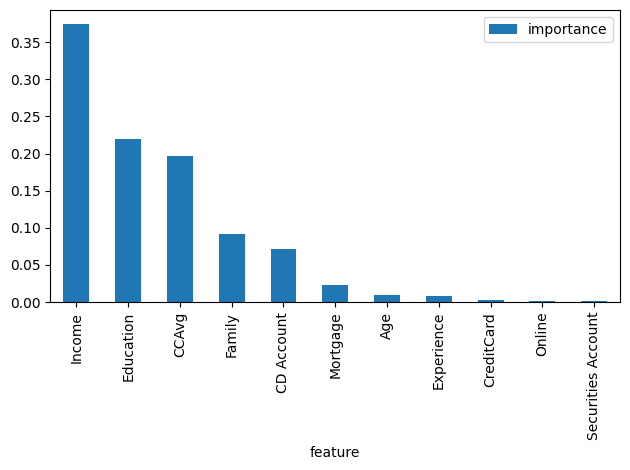

In [28]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# 3. Regression Trees

Let's now reset, and focus on a different objective: trying to predict **'Income'** based on the other features of the dataset. The Decision Tree will work the same with one important difference: the criterion to evaluate accuracy will no longer be the gini score, but rather, the sum of squared errors (since we are trying to predict 'income' which is a numerical variable).

In [29]:
# Import the Regression Tree classifier
from sklearn.tree import DecisionTreeRegressor

In [30]:
# Re-define X (inputs/predictors) and y (output/outcome)
y_reg = bank_df['Income']
X_reg = bank_df.drop(columns=['Income'])

In [31]:
# Split data into training and testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=0)

In [32]:
# Call the Decision Tree Object with parameters
# We're going to set max depth to 5 to keep things manageable
clf_reg = DecisionTreeRegressor(
      max_depth=5,
      min_samples_split = 40,
      min_samples_leaf = 100,
      min_impurity_decrease = 0.01,
      criterion = 'squared_error')

# Fit the model to the training data
clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=100, min_samples_split=40)

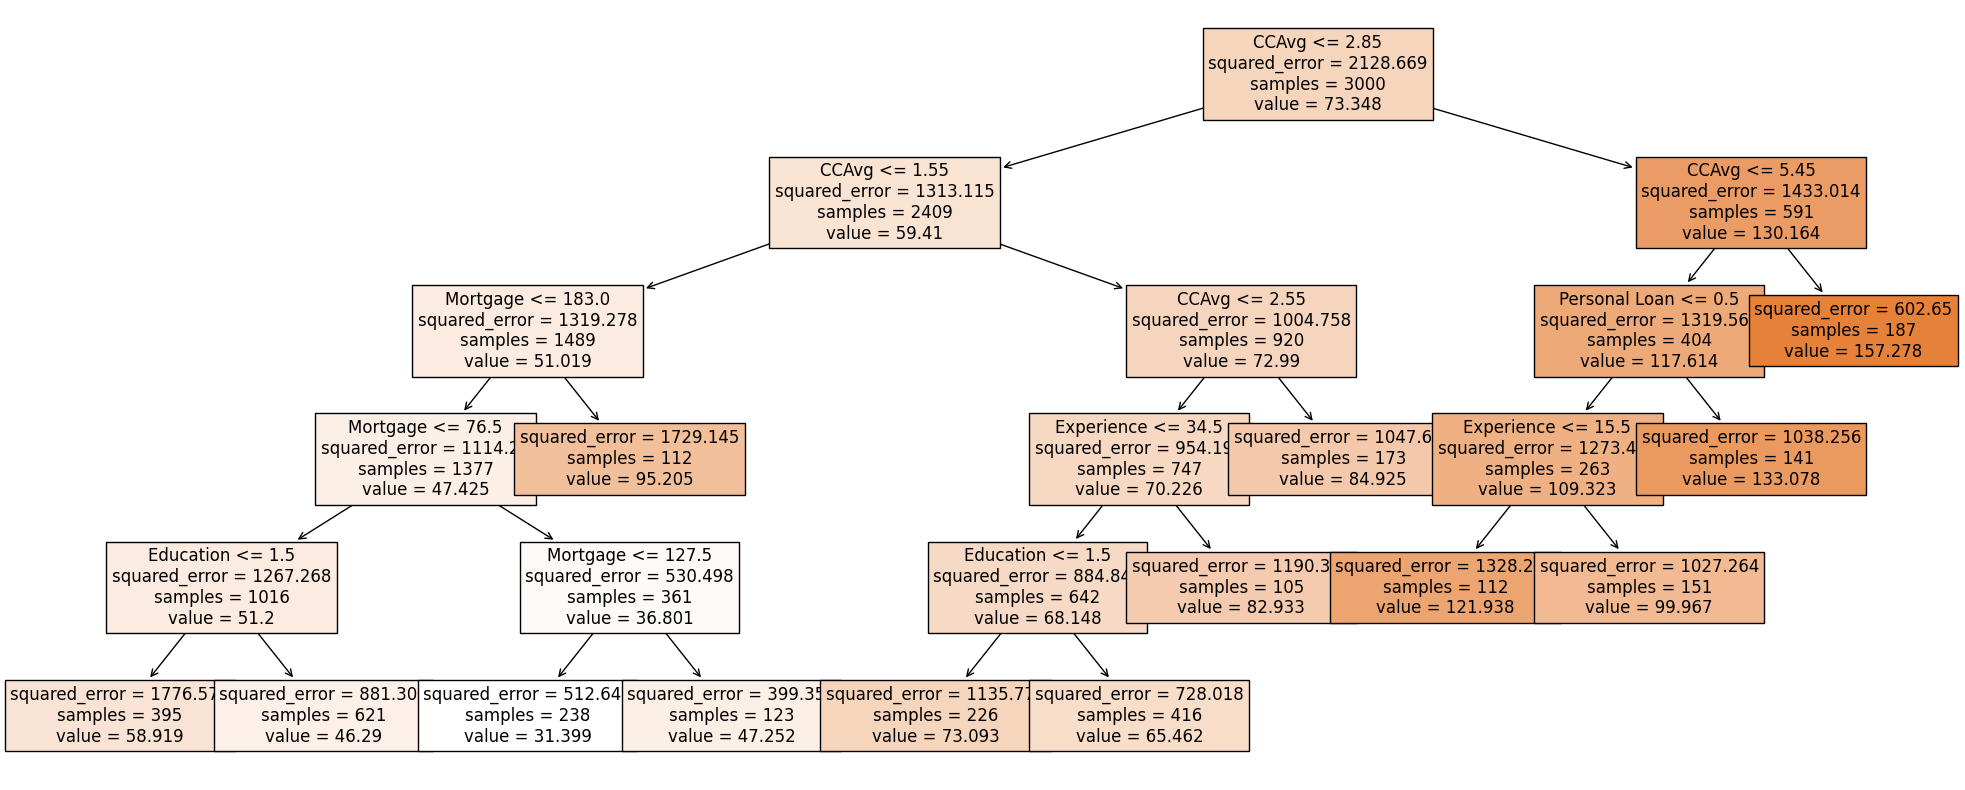

In [33]:
# Plot the regression tree
fig = plt.figure(figsize=(25,10))
tree.plot_tree(clf_reg, fontsize=12, feature_names=X_reg.columns, filled=True);

In [34]:
# dtreeviz has an even better display...
viz = dtreeviz.model(clf_reg,
               X_train=X_train_reg,
               y_train=y_train_reg,
               target_name='Income',
               feature_names=X_reg.columns);
viz.view(title="Regression Tree for Income",
         scale=1.8)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [35]:
# Evaluate the accuracy of the regression tree
y_test_reg_pred = clf_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg,y_test_reg_pred))
r2 = r2_score(y_test_reg,y_test_reg_pred)
print("RMSE=", round(rmse,3), "R2=", round(r2,3))

RMSE= 33.683 R2= 0.461
